<a href="https://colab.research.google.com/github/kari-hub/MTN-Python-dataframes/blob/master/Moringa_school_data_science_cohort_3_independent_project_week_4_Sarah_Wangari_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Service Company Analysis.

You have been hired as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

We will also conduct univariate and bivariate analyses on our data and later perform Exploratory Data Analysis.

#  Univariate Analysis.

## 1. Defining the Question


### a) Specifying the Question




> Which day of the week has the highest number of Bluecars taken in most postal codes in Paris.


### b) Defining the Metric for Success



### c) Understanding the context


### d) Recording the Experimental Design


### e) Data Relevance

## 2. Reading the Data

In [0]:
# We will first start by importing the libraries we will use in our analysis.

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


In [0]:
# Load our dataset 

data = pd.read_csv('autolib_daily_events_postal_code.csv')
data

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## 3. Checking the Data.

In [0]:
# We will determine the number of records in our data

data.shape

(16085, 13)

In [0]:
# Previewing the top of our dataset

data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
# Previewing the bottom of our data

data.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [0]:
# Checking the datatypes of our columns

data.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 4. Tidying our Dataset

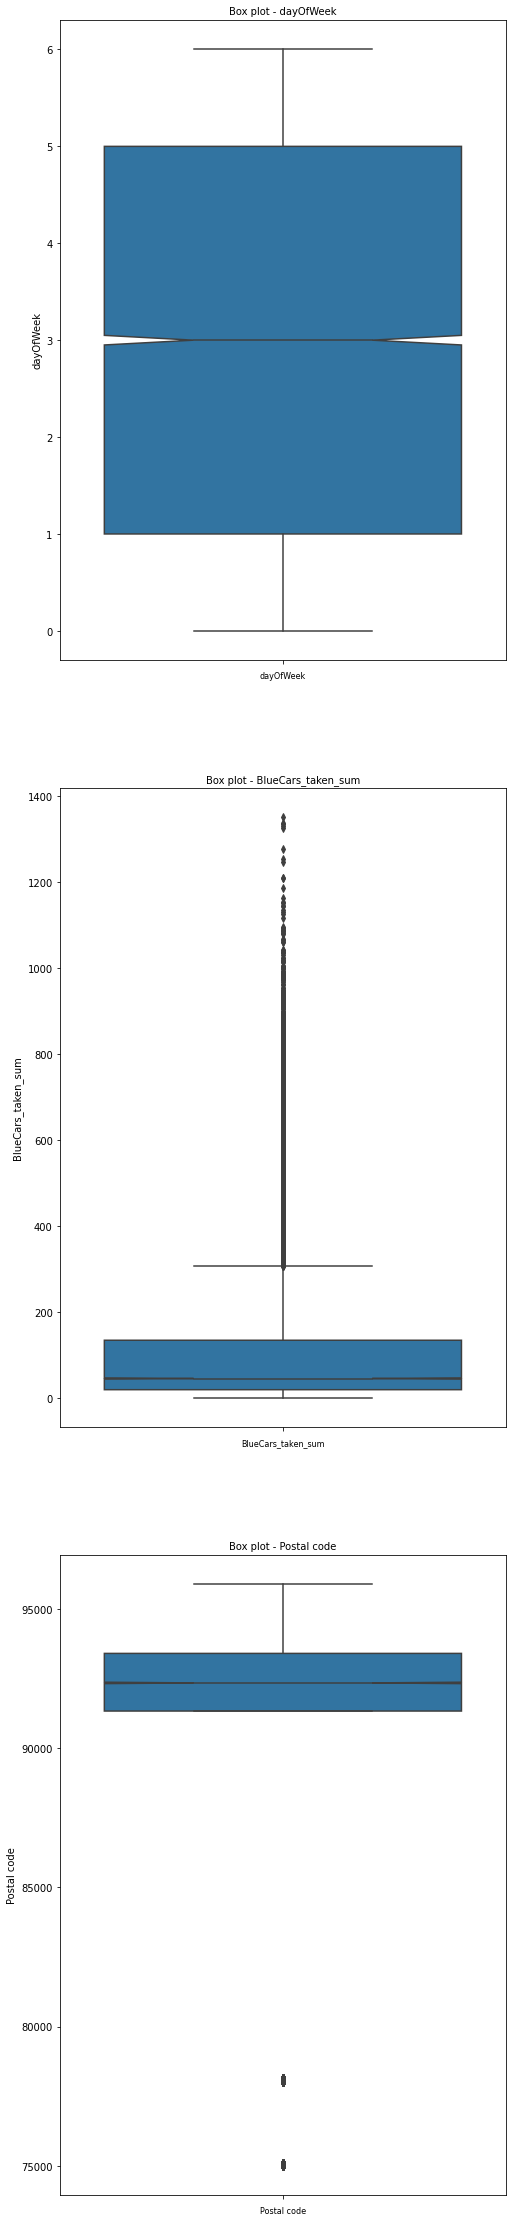

In [0]:
# We will check for outliers

col_names = ['dayOfWeek', 'BlueCars_taken_sum', 'Postal code']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

  sns.boxplot(y=data[col_val], notch=True, ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

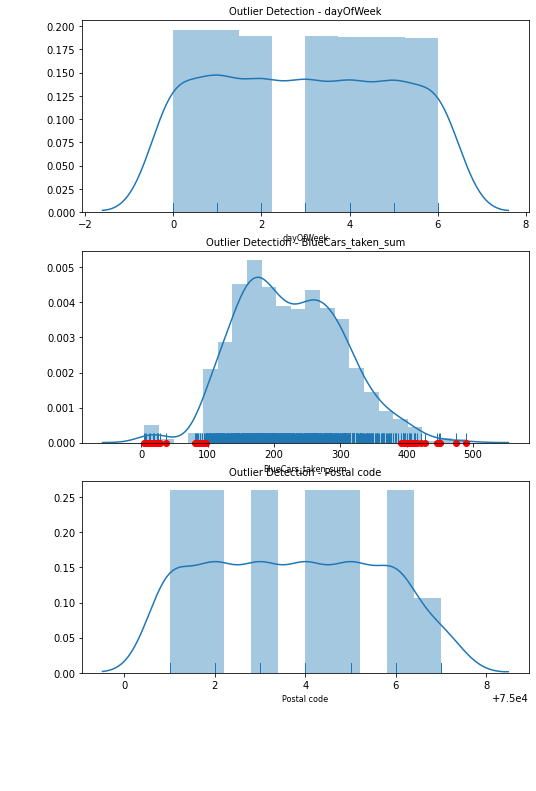

In [0]:
# We will also check for anomalies in our data

def percentile_based_outlier(data, threshold=95):
  diff = (100 - threshold)/2
  minval, maxval = np.percentile(data, [diff, 100 - diff])
  return (data < minval) | (data > maxval)

col_names = ['dayOfWeek', 'BlueCars_taken_sum', 'Postal code']  

fig, ax = plt.subplots(len(col_names), figsize=(8,12))

for i, col_val in enumerate(col_names):
  x = data[col_val][:1000]
  sns.distplot(x, ax=ax[i], rug=True, hist=True)
  outliers = x[percentile_based_outlier(x)]
  ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

  ax[i].set_title("Outlier Detection - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [0]:
# Identifying the missing data

data.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

We will not deal with missing data as there is none.

In [0]:
# We will then undertake more cleaning procedures.

# We will start by dropping unneccesary columns

data.drop(['date', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum'], axis=1, inplace=True)
data


,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...
16080,95880,1440,4,weekday,15,10,0,0
16081,95880,1440,5,weekend,19,19,0,0
16082,95880,1440,6,weekend,33,35,0,0
16083,95880,1440,0,weekday,11,14,0,0


In [0]:
# We will remove any spaces in between our data

data.columns.str.replace(" "," ")
data

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...
16080,95880,1440,4,weekday,15,10,0,0
16081,95880,1440,5,weekend,19,19,0,0
16082,95880,1440,6,weekend,33,35,0,0
16083,95880,1440,0,weekday,11,14,0,0


In [0]:
# We will then drop duplicates from our dataset
df = data.drop_duplicates()
df

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...
16080,95880,1440,4,weekday,15,10,0,0
16081,95880,1440,5,weekend,19,19,0,0
16082,95880,1440,6,weekend,33,35,0,0
16083,95880,1440,0,weekday,11,14,0,0


In [0]:
# We will then edit our columns names

df.columns = ['Postal_Code', 'Daily_Data_Points', 'Day_Of_Week', 'Day_Type', 'Taken_BlueCars', 'Returned_BlueCars', 'Freed_Slots', 'Taken_Slots']
df

,Postal_Code,Daily_Data_Points,Day_Of_Week,Day_Type,Taken_BlueCars,Returned_BlueCars,Freed_Slots,Taken_Slots
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...
16080,95880,1440,4,weekday,15,10,0,0
16081,95880,1440,5,weekend,19,19,0,0
16082,95880,1440,6,weekend,33,35,0,0
16083,95880,1440,0,weekday,11,14,0,0


In [0]:
# We will then filter our rows to only show postal codes with more than 5 taken BlueCars

df = df[df['Taken_BlueCars']>5]
df

,Postal_Code,Daily_Data_Points,Day_Of_Week,Day_Type,Taken_BlueCars,Returned_BlueCars,Freed_Slots,Taken_Slots
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...
16079,95880,1439,3,weekday,15,13,0,0
16080,95880,1440,4,weekday,15,10,0,0
16081,95880,1440,5,weekend,19,19,0,0
16082,95880,1440,6,weekend,33,35,0,0


In [0]:
# We will then filter our rows to only show postal codes with more than 5 returned BlueCars

df = df[df['Returned_BlueCars']>5]
df

,Postal_Code,Daily_Data_Points,Day_Of_Week,Day_Type,Taken_BlueCars,Returned_BlueCars,Freed_Slots,Taken_Slots
0,75001,1440,0,weekday,110,103,22,20
1,75001,1438,1,weekday,98,94,23,22
2,75001,1439,2,weekday,138,139,27,27
3,75001,1320,3,weekday,104,104,25,21
4,75001,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...
16079,95880,1439,3,weekday,15,13,0,0
16080,95880,1440,4,weekday,15,10,0,0
16081,95880,1440,5,weekend,19,19,0,0
16082,95880,1440,6,weekend,33,35,0,0


In [0]:
# We will then get more info regarding our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14924 entries, 0 to 16083
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Postal_Code        14924 non-null  int64 
 1   Daily_Data_Points  14924 non-null  int64 
 2   Day_Of_Week        14924 non-null  int64 
 3   Day_Type           14924 non-null  object
 4   Taken_BlueCars     14924 non-null  int64 
 5   Returned_BlueCars  14924 non-null  int64 
 6   Freed_Slots        14924 non-null  int64 
 7   Taken_Slots        14924 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.0+ MB


## 5. Exploratory analysis

In [0]:
# We will then describe our data

df.describe()


,Postal_Code,Daily_Data_Points,Day_Of_Week,Taken_BlueCars,Returned_BlueCars,Freed_Slots,Taken_Slots
count,14924.000000,14924.000000,14924.000000,14924.000000,14924.000000,14924.000000,14924.000000
mean,88533.569954,1431.618534,2.992026,135.246315,135.191906,24.373358,24.372219
std,7789.007663,33.231331,2.007626,189.330430,189.436260,53.718380,53.745900
min,75001.000000,1174.000000,0.000000,6.000000,6.000000,0.000000,0.000000
25%,78150.000000,1439.000000,1.000000,24.000000,24.000000,0.000000,0.000000
50%,92320.000000,1440.000000,3.000000,52.000000,52.000000,0.000000,0.000000
75%,93360.000000,1440.000000,5.000000,151.000000,150.000000,6.000000,6.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,360.000000,359.000000


In [0]:
# We wiil then preview our unique values
df.nunique()


Postal_Code          104
Daily_Data_Points     23
Day_Of_Week            7
Day_Type               2
Taken_BlueCars       926
Returned_BlueCars    923
Freed_Slots          297
Taken_Slots          301
dtype: int64

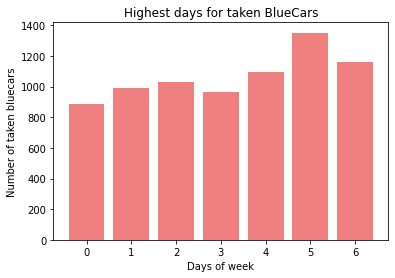

In [0]:
# We wiil then create a bar graph to see which days of the week had the most taken BlueCars

plt.bar(df['Day_Of_Week'], df['Taken_BlueCars'], color='lightcoral')
plt.ylabel("Number of taken bluecars")
plt.xlabel("Days of week")
plt.title("Highest days for taken BlueCars")
plt.show()

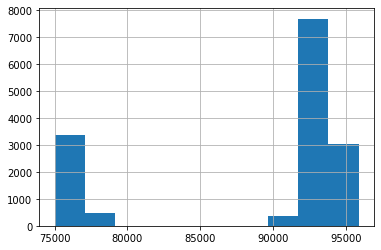

In [0]:
# We will create a histogram to show the postal codes with the highest number of taken Bluecars

df['Postal_Code'].hist()

In [0]:
# We find the mean number of Blue cars taken

df['Taken_BlueCars'].mean()

135.2463146609488

In [0]:
# Finding the mean of Bluecars during weekends

DF = df[df['Day_Of_Week']>4]
DF

,Postal_Code,Daily_Data_Points,Day_Of_Week,Day_Type,Taken_BlueCars,Returned_BlueCars,Freed_Slots,Taken_Slots
5,75001,1437,5,weekend,187,185,38,35
6,75001,1440,6,weekend,180,180,34,34
12,75001,1440,5,weekend,224,223,38,38
13,75001,1440,6,weekend,193,193,22,20
19,75001,1439,5,weekend,217,217,41,39
...,...,...,...,...,...,...,...,...
16068,95880,1440,6,weekend,36,33,0,0
16074,95880,1440,5,weekend,15,15,0,0
16075,95880,1440,6,weekend,34,32,0,0
16081,95880,1440,5,weekend,19,19,0,0


In [0]:
DF['Taken_BlueCars'].mean()

161.09517078916372

In [0]:
# Finding the mode in occurrence of postal codes

df['Postal_Code'].mode()

0     75001
1     75003
2     75004
3     75005
4     75006
5     75007
6     75008
7     75009
8     75010
9     75011
10    75012
11    75013
12    75014
13    75015
14    75016
15    75017
16    75018
17    75019
18    75020
19    92100
20    92130
21    92500
22    92600
dtype: int64

In [0]:
# Finding the mean of the number of daily data points

df['Daily_Data_Points'].mean()

1431.6185339051192

In [0]:
# Finding the mode occurence in days of the week

df['Day_Of_Week'].mode()

0    0
dtype: int64

In [0]:
# Finding the standard deviations for our data.
df['Daily_Data_Points'].std()


33.23133065495242

In [0]:
df['Day_Of_Week'].std()


2.007625533934758

In [0]:
DF['Day_Of_Week'].std()

0.4999928395593512

In [0]:
df['Freed_Slots'].std()


53.71838034605329

In [0]:
df['Returned_BlueCars'].std()


189.43625978400965

In [0]:
df['Taken_BlueCars'].std()


189.33042992749424

In [0]:
df['Taken_Slots'].std()

53.745900433893205

In [0]:
# Finding the range for our data
cars_max = df['Taken_BlueCars'].max()
cars_min = df['Taken_BlueCars'].min()

range = cars_max - cars_min
range

1346

In [0]:
pts_max = df['Daily_Data_Points'].max()
pts_min = df['Daily_Data_Points'].min()

range = pts_max - pts_min
range

266

In [0]:
# Calculate the skewness of our data

df['Day_Of_Week'].skew()

0.004371603252640631

In [0]:
df['Daily_Data_Points'].skew()

-5.841630735213734

In [0]:
df['Taken_BlueCars'].skew()

2.308732391641623

In [0]:
df['Postal_Code'].skew()

-1.08429051064418

In [0]:
# Measuring the kurtosis of our data

df['Daily_Data_Points'].kurt()

37.417765351944965

In [0]:
df['Day_Of_Week'].kurt()

-1.2551740665477458

In [0]:
df['Postal_Code'].kurt()

-0.7387263624707905

In [0]:
df['Taken_BlueCars'].kurt()

5.61387912030982

In [0]:
df

In [0]:
# We will plot our univariate summaries and record observations

sns.pairplot(df)
plt.show()

In [0]:
# Using a heatmap

sns.heatmap(df.corr(), annot=True)
plt.show()

# Bivariate analysis

## 1. Defining the Question


### a) Specifying the Data Analytic Question



> What is the relationship between the number of Bluecars and the postal codes 

### b) Defining the Metric for Success


### c) Understanding the context


### d) Recording the Experimental Design


### e) Data Relevance

## 2. Reading our data

In [0]:
# Previwing our data

df

## 3. Exploratory Data Analysis

In [0]:
# Create a scatter plot to compare the number of taken and returned Bluecars

plt.scatter(df['Returned_BlueCars'], df['Taken_BlueCars'])
plt.title("Taken vs returned")
plt.xlabel("Returned cars")
plt.ylabel("Taken cars")
plt.show()

In [0]:
# Finding the correlation between the taken Bluecars and the day of the week

df['Day_Of_Week'].corr(df['Taken_BlueCars'])

# This shows that their correlation is weak

In [0]:
# Correlation between postal codes and taken Bluecars
df['Postal_Code'].corr(df['Taken_BlueCars'])

# They have high negative correlation

In [0]:
# Correlation between postal codes and returned Bluecars

df['Postal_Code'].corr(df['Returned_BlueCars'])

# This shows they have high negative correlation

In [0]:
# Correlation between the number of taken and returned Bluecars

df['Taken_BlueCars'].corr(df['Returned_BlueCars'])

# This shows high positive correlation                          

In [0]:
# Correlation between daily data points and days of the week

df['Daily_Data_Points'].corr(df['Day_Of_Week'])

# This shows very weak positive correlation

In [0]:
# Filter out our columns

a1= df.drop(['Day_Type', 'Freed_Slots', 'Taken_Slots'], axis=1, inplace=True)
a1